In [5]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

In [2]:
dfs=api.get_dataframe('dfs_salaries')
dfs.sample(4)

,season,week_num,player_name,team_name,pos,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
7149,2016,17,Shaun Hill,MIN,QB,CHI,-0.3,6000.0,-0.3,5000.0,-0.3,20.0,HillSh00
6567,2016,16,Trey Burton,PHI,TE,NYG,0.8,4500.0,1.3,2500.0,0.8,10.0,BurtTr01
341,2016,1,Eli Rogers,PIT,WR,WAS,14.9,4500.0,17.9,4200.0,14.9,10.0,RogeEl00
5125,2016,13,Minnesota Defense,MIN,Def,DAL,8.0,4400.0,8.0,3400.0,8.0,16.0,


In [3]:
dfs.describe()

,season,week_num,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary
count,7391.0,7391.000000,7391.000000,7286.000000,6823.000000,6764.000000,6821.000000,6761.000000
mean,2016.0,9.086051,6.445696,5308.591820,7.461489,3917.519219,6.384730,15.374057
std,0.0,4.985083,7.014115,1148.511146,8.198509,1495.468732,7.173386,7.424043
min,2016.0,1.000000,-4.000000,3000.000000,-4.000000,2000.000000,-4.000000,10.000000
25%,2016.0,5.000000,0.600000,4500.000000,0.400000,3000.000000,0.300000,10.000000
50%,2016.0,9.000000,4.200000,4700.000000,4.900000,3100.000000,4.000000,11.000000
75%,2016.0,13.500000,10.100000,5900.000000,11.800000,4900.000000,10.100000,19.000000
max,2016.0,17.000000,49.800000,9700.000000,54.800000,10000.000000,49.800000,42.000000


In [11]:
dfs.groupby(["pos"]).agg([max])

,season,week_num,player_name,team_name,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
,max,max,max,max,max,max,max,max,max,max,max,max
pos,,,,,,,,,,,,
Def,2016,17,Washington Defense,WAS,WAS,35.00,5400.0,35.00,4100.0,35.00,22.0,
PK,2016,17,Wil Lutz,WAS,WAS,23.00,5300.0,NaN,NaN,NaN,NaN,vinatada01
QB,2016,17,Tyrod Taylor,WAS,WAS,37.18,9300.0,40.18,8500.0,37.18,42.0,WinsJa00
RB,2016,17,Zach Zenner,WAS,WAS,49.80,9500.0,54.80,9800.0,49.80,42.0,ZennZa00
TE,2016,17,Zach Miller,WAS,WAS,32.40,8500.0,41.90,7200.0,32.40,30.0,WittJa00
WR,2016,17,Willie Snead,WAS,WAS,42.00,9700.0,51.00,10000.0,42.00,41.0,WynnSh00


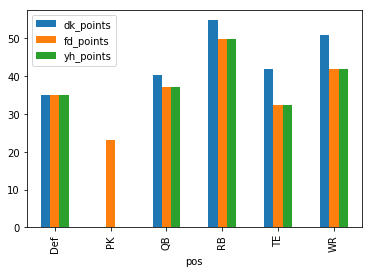

In [19]:
dfs.groupby("pos")[['pos','dk_points','fd_points','yh_points']].agg(max).plot(kind="bar")